In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv('adult.csv')

In [4]:
# Drop rows with missing values
df = df.replace('?', pd.NA).dropna()

In [5]:
# Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [6]:
# Features and target
X = df.drop('income', axis=1)  # 'income' is usually the target column
y = df['income']


In [7]:
# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [8]:
# Predict
y_pred = model.predict(X_test)

In [9]:
# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("0 => <=50K\n1 => >50K\n")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[6483  359]
 [1538  665]]
0 => <=50K
1 => >50K


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87      6842
           1       0.65      0.30      0.41      2203

    accuracy                           0.79      9045
   macro avg       0.73      0.62      0.64      9045
weighted avg       0.77      0.79      0.76      9045

Accuracy: 0.7902708678828082


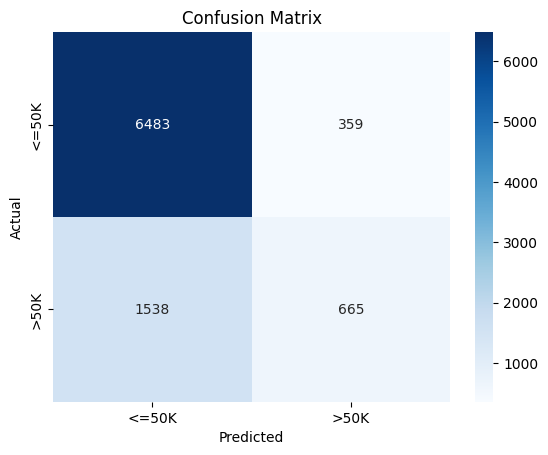

In [11]:
# Define labels
labels = ['<=50K', '>50K']
# Optional: Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d',xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()